In [94]:
# Import relevant modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [95]:
# Read in the df_levels

df_levels = pd.read_excel("./pwt100.xlsx", sheet_name = "Data", header = 0)

# Clean the df_levels

#Select the country to analyse
country_selection = "Germany"

# Extract relevant columns
df_levels = df_levels.loc[:, ("country", "year", "rgdpna", "pop", "rnna", "emp", "hc")]

# Calculate GDP per capita and per worker
df_levels["rgdpna_pc"] = df_levels["rgdpna"] / df_levels["pop"]
df_levels["rgdpna_pw"] = df_levels["rgdpna"] / df_levels["emp"]

# Filter for the country of choice
df_levels = df_levels.loc[df_levels["country"] == country_selection,:]
df_levels = df_levels.reset_index(drop = True)

# Remove rows with missing df_levels
ymax = df_levels.loc[df_levels["rgdpna"] > 0, "year"].max()
ymin = df_levels.loc[df_levels["rgdpna"] > 0, "year"].min()
df_levels = df_levels.loc[df_levels["year"] >= ymin, :]

df_levels["year"] = pd.to_datetime(df_levels["year"], format = "%Y")

In [96]:
# Extract TFP measure
alpha = 0.3  # benchmark alpha value

rnna = df_levels["rnna"]  # capital variable
emp = df_levels["emp"]  # labour variable
hc = df_levels["hc"]  # human capital variable

# tfp from cobb-douglas production function without human capital
tfp_full = df_levels["rgdpna"] / ((rnna ** alpha) * (emp ** (1 - alpha)))

# tfp from cobb-douglas production function with human capital
tfp_ex_hc = df_levels["rgdpna"] / ((rnna ** alpha) * ((hc * emp) ** (1 - alpha)))

# add new variables to the df_levels frame
df_levels["TFP_full"] = tfp_full
df_levels["TFP_ex_hc"] = tfp_ex_hc

In [127]:
year_of_interest = {
    'Germany': "1989",
    'Indonesia' : "1997",
}

In [98]:
import reg_functions as reg

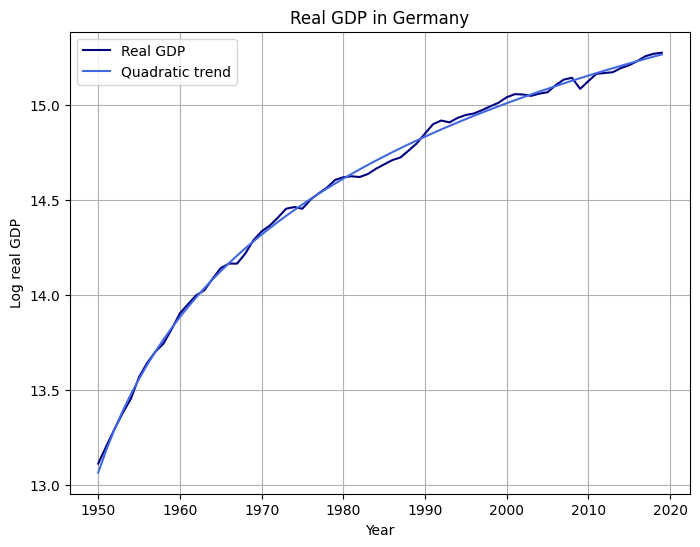

In [99]:
# Plot GDP trend paths
fig = plt.figure(figsize=(8,6))

(ax) = fig.subplots(1,1)

ax.plot(df_levels["year"], np.log(df_levels["rgdpna"]), label = "Real GDP", color = "navy")
ax.plot(df_levels["year"], np.log(reg.calc_add_quad(df_levels["rgdpna"])), label = "Quadratic trend", color = "royalblue")
ax.set_xlabel("Year")
ax.set_ylabel("Log real GDP")
ax.set_title(("Real GDP in " + country_selection))
ax.legend()
ax.grid(True)

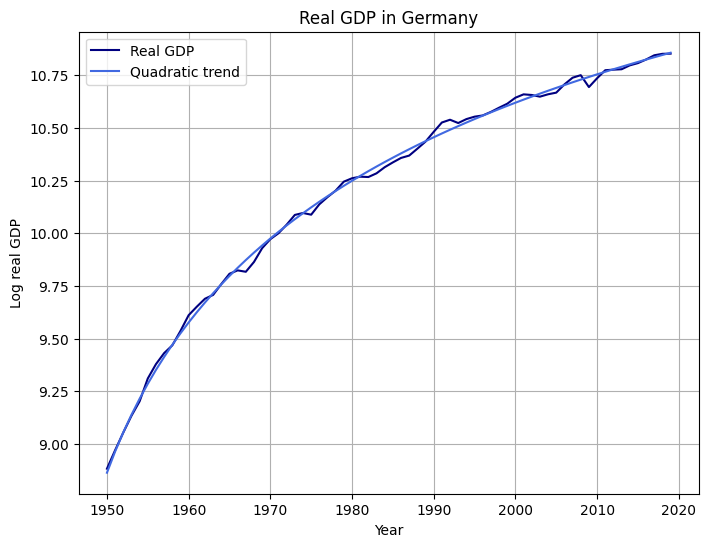

In [100]:
# Plot GDP per capita trend paths
fig = plt.figure(figsize=(8,6))

(ax) = fig.subplots(1,1)

ax.plot(df_levels["year"], np.log(df_levels["rgdpna_pc"]), label = "Real GDP", color = "navy")
ax.plot(df_levels["year"], np.log(reg.calc_add_quad(df_levels["rgdpna_pc"])), label = "Quadratic trend", color = "royalblue")
ax.set_xlabel("Year")
ax.set_ylabel("Log real GDP")
ax.set_title(("Real GDP in " + country_selection))
ax.legend()
ax.grid(True)


Text(0, 0.5, 'Log Real GDP per capita for Germany')

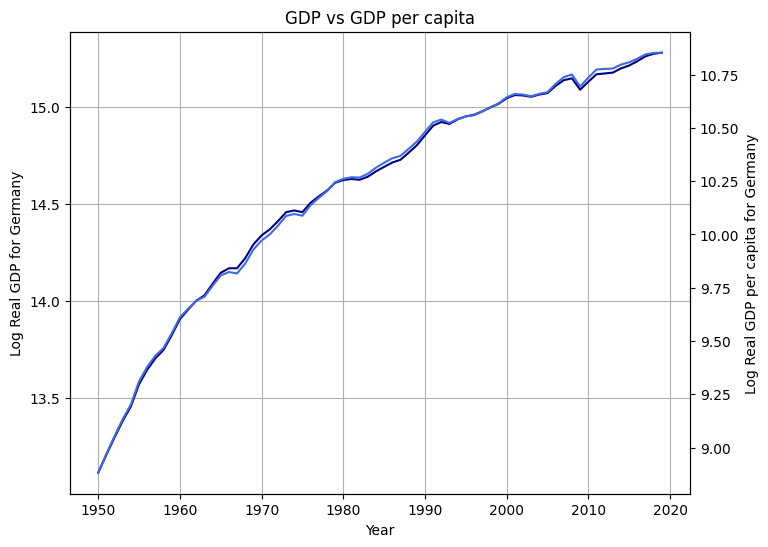

In [101]:
# Plot GDP vs GDP per capita
fig = plt.figure(figsize=(8,6))

(ax1) = fig.subplots(1,1)

ax1.plot(df_levels["year"], np.log(df_levels["rgdpna"]), label="GDP", color="navy")
ax1.set_title("GDP vs GDP per capita")
ax1.set_xlabel("Year")
ax1.set_ylabel("Log Real GDP for " + country_selection)
ax1.ticklabel_format(style="plain", axis="y")
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(df_levels["year"], np.log(df_levels["rgdpna_pc"]), label="GDP per Capita", color="royalblue")
ax2.set_ylabel("Log Real GDP per capita for " + country_selection)

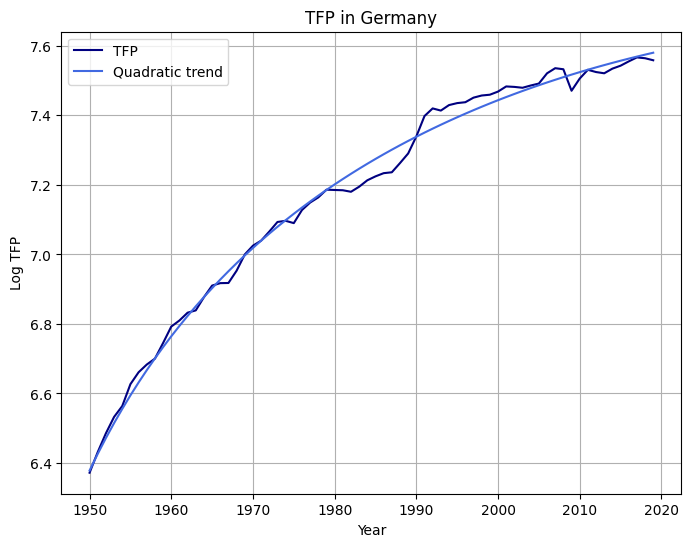

In [110]:
fig = plt.figure(figsize=(8,6))

(ax) = fig.subplots(1,1)

ax.plot(df_levels["year"], np.log(df_levels["TFP_full"]), label = "TFP", color = "navy")
ax.plot(df_levels["year"], np.log(reg.calc_add_quad(df_levels["TFP_full"])), label = "Quadratic trend", color = "royalblue")
ax.set_xlabel("Year")
ax.set_ylabel("Log TFP")
ax.set_title(("TFP in " + country_selection))
ax.legend()
ax.grid(True)

In [130]:
df_growth = df_levels.loc[:,("rgdpna", "pop", "rnna", "emp", "hc", "rgdpna_pc", "rgdpna_pw", "TFP_full", "TFP_ex_hc")].pct_change()
df_growth.insert(0, "country", country_selection)
df_growth.insert(1, "year", df_levels["year"])
df_growth = df_growth.dropna().reset_index(drop = True)

df_growth_5year = df_growth.resample("5Y", on = "year").mean()
df_growth_10year = df_growth.resample("10Y", on = "year").mean()

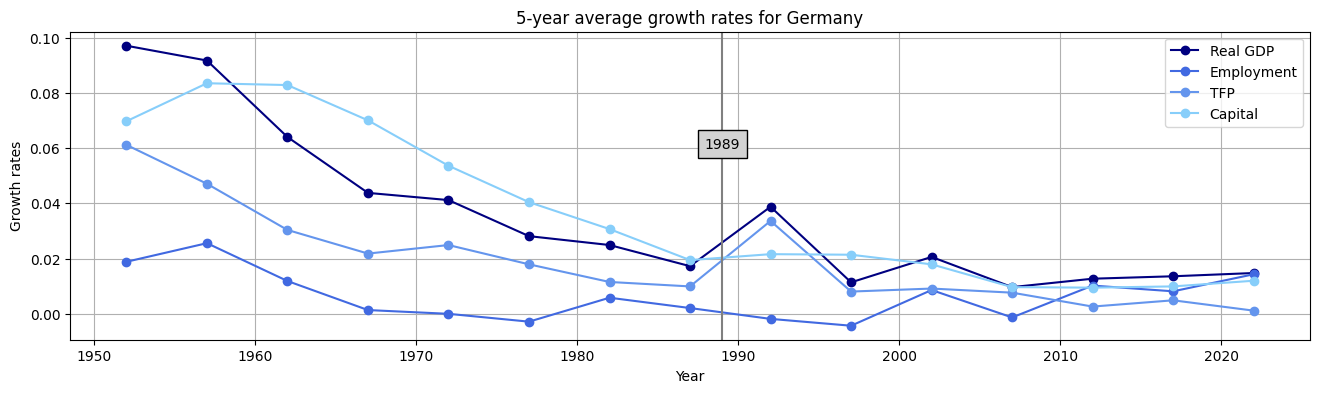

In [128]:
fig = plt.figure(figsize=(16,4))

ax = fig.subplots(1,1)

ax.plot(df_growth_5year.index, df_growth_5year["rgdpna"], label = "Real GDP", color = "navy", marker = "o")
ax.plot(df_growth_5year.index, df_growth_5year["emp"], label = "Employment", color = "royalblue", marker = "o")
ax.plot(df_growth_5year.index, df_growth_5year["TFP_full"], label = "TFP", color = "cornflowerblue", marker = "o")
ax.plot(df_growth_5year.index, df_growth_5year["rnna"], label = "Capital", color = "lightskyblue", marker = "o")
ax.set_xlabel("Year")
ax.set_ylabel("Growth rates")
ax.set_title("5-year average growth rates for " + country_selection)
ax.axvline(pd.to_datetime(year_of_interest[country_selection]), color="gray")
ax.text(pd.to_datetime(year_of_interest[country_selection]),0.06, year_of_interest[country_selection], bbox ={'facecolor':'lightgray','alpha':1,'pad':5}, horizontalalignment = 'center')
ax.grid(True)
ax.legend()

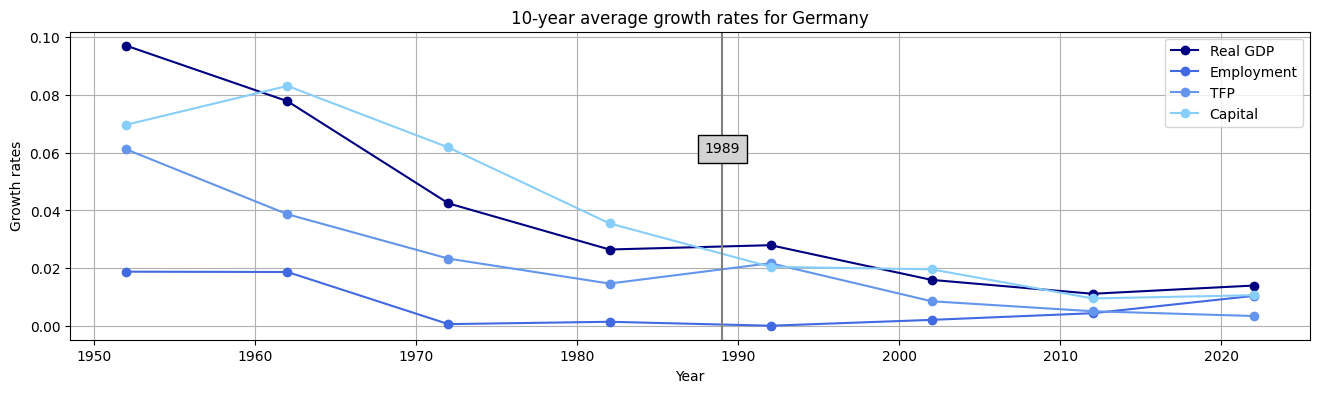

In [129]:
fig = plt.figure(figsize=(16,4))

ax = fig.subplots(1,1)

ax.plot(df_growth_10year.index, df_growth_10year["rgdpna"], label = "Real GDP", color = "navy", marker = "o")
ax.plot(df_growth_10year.index, df_growth_10year["emp"], label = "Employment", color = "royalblue", marker = "o")
ax.plot(df_growth_10year.index, df_growth_10year["TFP_full"], label = "TFP", color = "cornflowerblue", marker = "o")
ax.plot(df_growth_10year.index, df_growth_10year["rnna"], label = "Capital", color = "lightskyblue", marker = "o")
ax.set_xlabel("Year")
ax.set_ylabel("Growth rates")
ax.set_title("10-year average growth rates for " + country_selection)
ax.axvline(pd.to_datetime(year_of_interest[country_selection]), color="gray")
ax.text(pd.to_datetime(year_of_interest[country_selection]),0.06, year_of_interest[country_selection], bbox ={'facecolor':'lightgray','alpha':1,'pad':5}, horizontalalignment = 'center')
ax.grid(True)
ax.legend()